In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import os
from pandas.plotting import autocorrelation_plot


import warnings
import itertools

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import scipy.integrate as integrate
import scipy.special as special

In [2]:
wages_path = 'wages.xlsx'

wages = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time','NSW','VIC','QLD','SA','WA','TAS','NT'])
wages = pd.DataFrame(wages)
wages = wages.set_index('time').asfreq('QS-DEC')

# Read the Excel file into a pandas DataFrame
wages_pre_covid =wages.iloc[:40]


In [3]:
wages_nsw = wages['NSW']
wages_vic = wages['VIC']
wages_qld = wages['QLD']
wages_sa = wages['SA']
wages_wa = wages['WA']
wages_tas = wages['TAS']
wages_nt = wages['NT']

<Axes: xlabel='time'>

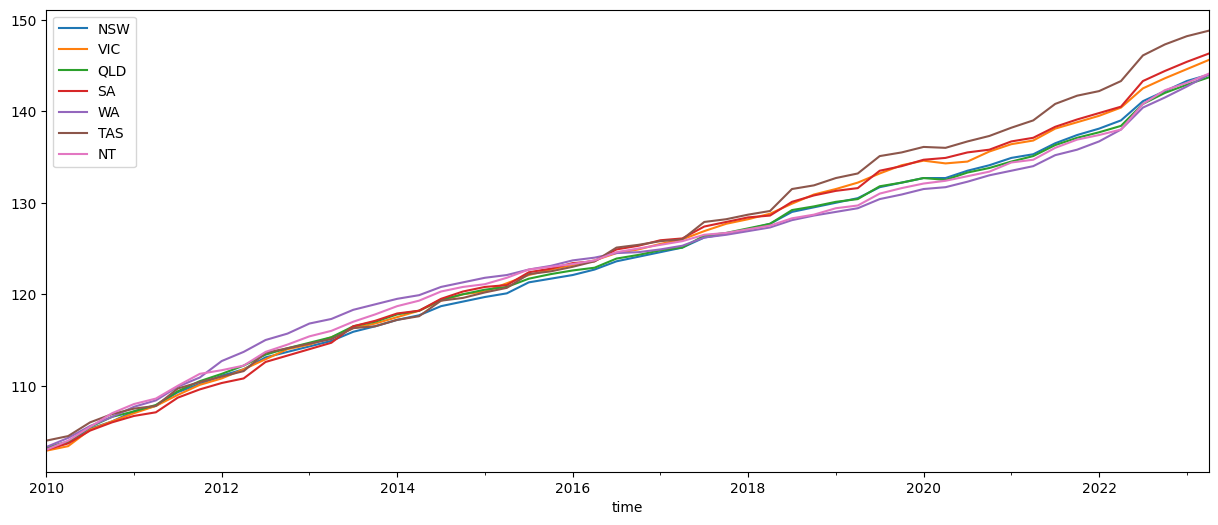

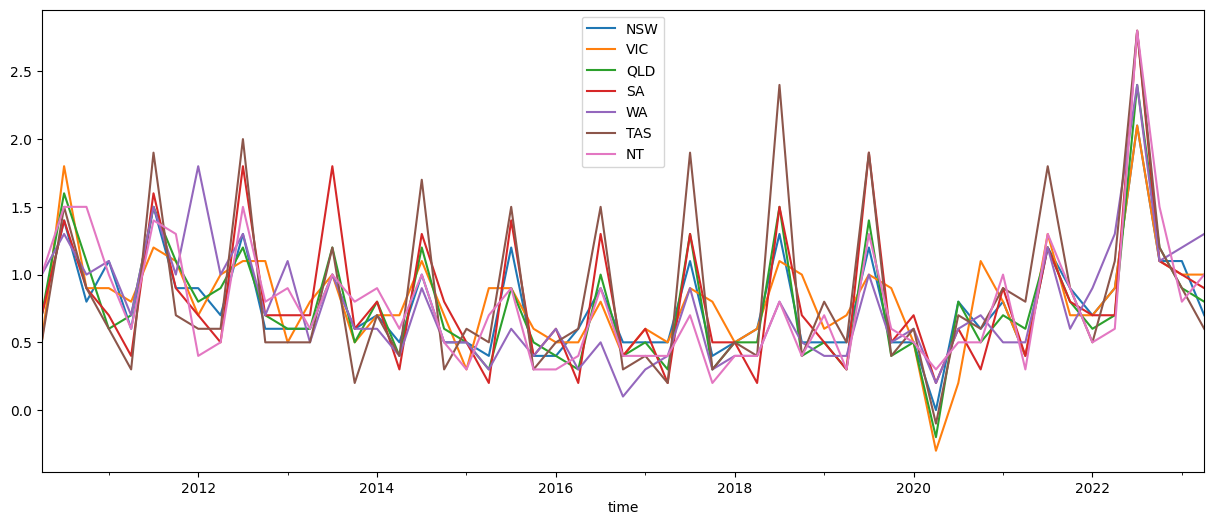

In [4]:
wages.plot(figsize=(15, 6))
wages_change = wages.diff().dropna()
wages_change.plot(figsize=(15, 6))

In [5]:
wages_pre_covid_nsw = wages_pre_covid['NSW']
wages_pre_covid_vic = wages_pre_covid['VIC']
wages_pre_covid_qld = wages_pre_covid['QLD']
wages_pre_covid_sa = wages_pre_covid['SA']
wages_pre_covid_wa = wages_pre_covid['WA']
wages_pre_covid_tas = wages_pre_covid['TAS']
wages_pre_covid_nt = wages_pre_covid['NT']

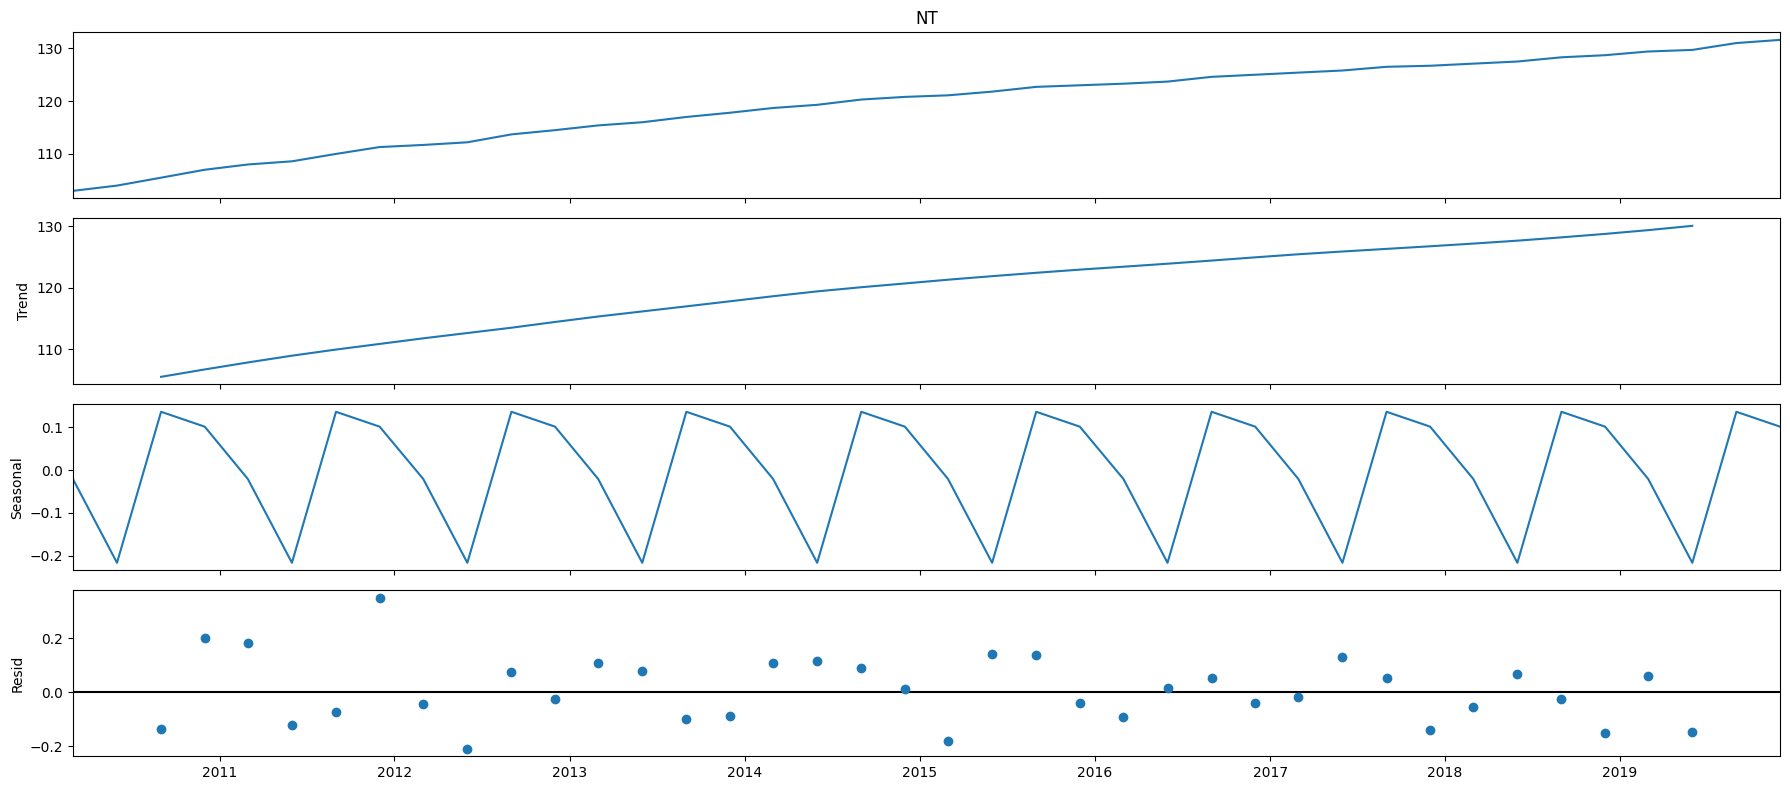

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(wages_pre_covid_nt, model='additive')
decomposition.plot()
plt.show()

Time series forecasting with ARIMA


In [7]:
def adfuller_test(wage):
    result=adfuller(wage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(wages_pre_covid_nt)

ADF Test Statistic : 0.3432507376494992
p-value : 0.9792440751807733
#Lags Used : 4
Number of Observations : 35
weak evidence against null hypothesis,indicating it is non-stationary 


In [8]:
wages_pre_covid_nt = wages_pre_covid_nt.diff().dropna()

In [9]:
def adfuller_test(wage):
    result=adfuller(wage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(wages_pre_covid_nt)

ADF Test Statistic : -2.667459977706855
p-value : 0.07984034774117427
#Lags Used : 3
Number of Observations : 35
weak evidence against null hypothesis,indicating it is non-stationary 


In [10]:
wages_pre_covid_nt = wages_pre_covid_nt.diff().dropna()

In [11]:
def adfuller_test(wage):
    result=adfuller(wage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(wages_pre_covid_nt)

ADF Test Statistic : -11.709012732437493
p-value : 1.5046046341781409e-21
#Lags Used : 2
Number of Observations : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


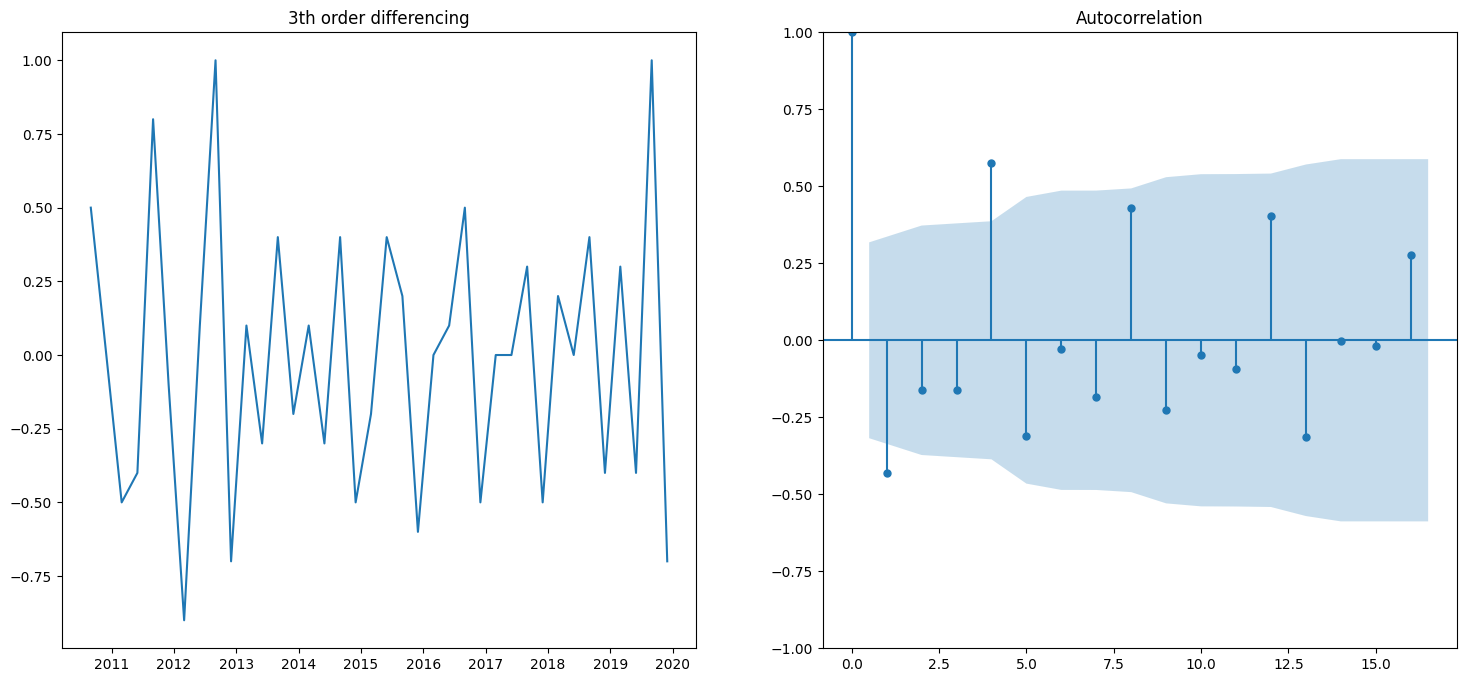

In [12]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('3th order differencing')
ax1.plot(wages_pre_covid_nt)

ax2 = f.add_subplot(122)
plot_acf(wages_pre_covid_nt, ax=ax2)
plt.show()

As from the above observation, after the 4 order differencing, the p-value drops beyond the threshold order and shows strong evidence against the null hypothesis, sp taking "d" as 3. 

We see the 4th lag is the most significant. so p is 4.

There are 3 lags crossed the threshold, so q is 1.


In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
                
for param_seasonal in seasonal_pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_nt,
                                            order=(4, 3, 1),
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results  = mod.fit()
        print('ARIMA(4, 3, 1)x{}12 - AIC:{}'.format(param_seasonal, results.aic))
    except:
        continue

ARIMA(4, 3, 1)x(0, 0, 0, 12)12 - AIC:56.357451261507
ARIMA(4, 3, 1)x(0, 0, 1, 12)12 - AIC:30.63511922749292
ARIMA(4, 3, 1)x(0, 1, 0, 12)12 - AIC:41.89641046090044


E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opt

ARIMA(4, 3, 1)x(0, 1, 1, 12)12 - AIC:6.850174874814378
ARIMA(4, 3, 1)x(1, 0, 0, 12)12 - AIC:29.574241952318552
ARIMA(4, 3, 1)x(1, 0, 1, 12)12 - AIC:31.484123384778947
ARIMA(4, 3, 1)x(1, 1, 0, 12)12 - AIC:6.7807439889175205
ARIMA(4, 3, 1)x(1, 1, 1, 12)12 - AIC:8.78072073464039


E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [14]:
#(p, d, q)

mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_nt,
                                order=(4, 3, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4894      0.281     -5.299      0.000      -2.040      -0.939
ar.L2         -1.5214      0.429     -3.550      0.000      -2.361      -0.681
ar.L3         -1.1913      0.340     -3.507      0.000      -1.857      -0.526
ar.L4         -0.4740      0.223     -2.126      0.033      -0.911      -0.037
ma.L1         -1.0000   1.51e+04  -6.64e-05      1.000   -2.95e+04    2.95e+04
ar.S.L12       0.0994      0.331      0.300      0.764      -0.549       0.748
sigma2         0.2318   3489.957   6.64e-05      1.000   -6839.957    6840.421


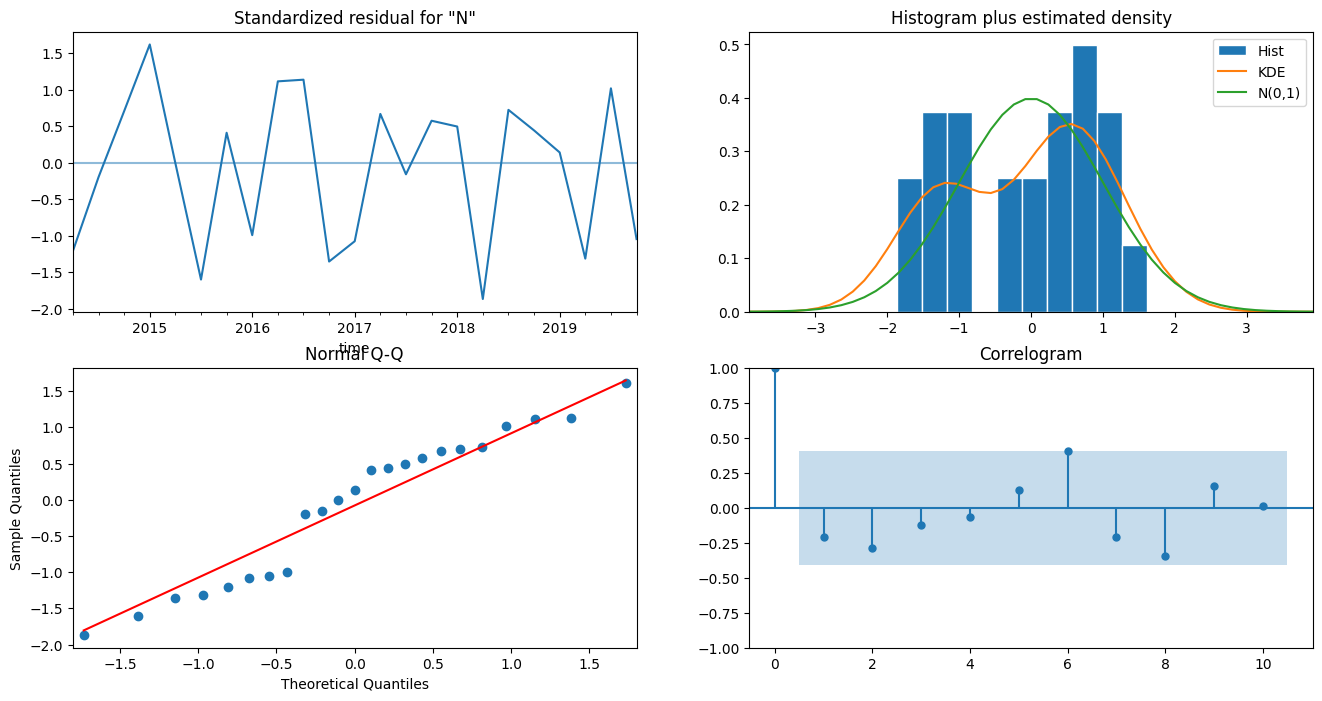

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

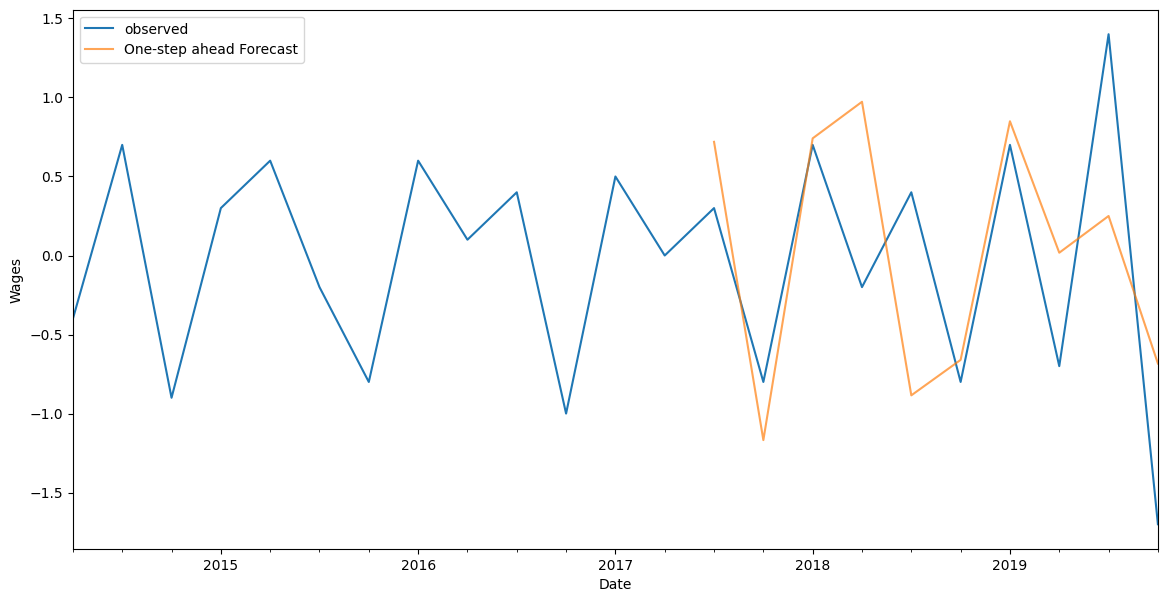

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-06-01'), dynamic=False)
pred_ci = pred.conf_int().diff().dropna()
ax = wages_pre_covid_nt['2014':].diff().dropna().plot(label='observed')

pred.predicted_mean.diff().dropna().plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Wages')
plt.legend()
plt.show()

E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6327      0.303     -5.394      0.000      -2.226      -1.039
ar.L2         -1.3489      0.257     -5.241      0.000      -1.853      -0.844
ar.L3         -1.3370      0.309     -4.321      0.000      -1.944      -0.731
ar.L4         -0.7654      0.338     -2.263      0.024      -1.428      -0.102
ma.L1         -0.8648    439.708     -0.002      0.998    -862.677     860.947
ma.L2         -0.6856     77.128     -0.009      0.993    -151.854     150.483
ma.L3          0.9362    456.997      0.002      0.998    -894.761     896.633
ma.S.L12       0.4999      0.918      0.545      0.586      -1.299       2.299
sigma2         0.0577     28.168      0.002      0.998     -55.150      55.266
            lower NT  upper NT  Predictions
2020-03-01  0.360587  1.345933     0.853260
2020-06-01  0.248721  1.363270     0.805995

E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


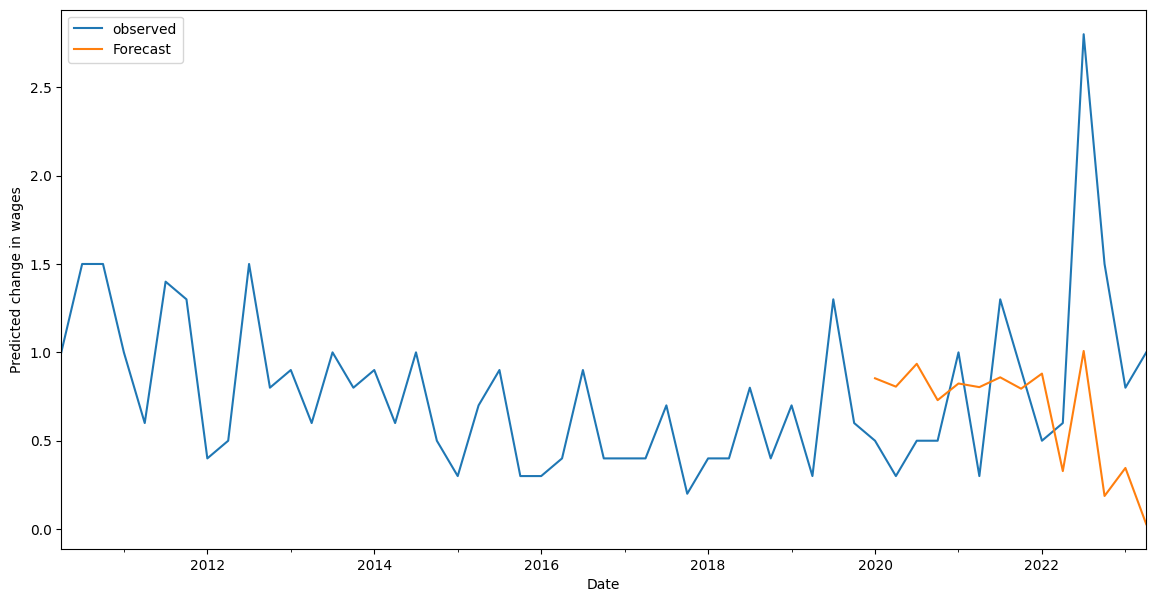

In [17]:
wages_pre_covid_nt = wages_pre_covid['NT']
wages_pre_covid_nt = wages_pre_covid_nt.diff().dropna()

mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_nt,
                                order=(4, 3, 3),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred_uc = results.get_forecast(steps=14)
pred_ci = pred_uc.conf_int()
ax = wages_nt.diff().dropna().plot(label='observed', figsize=(14, 7))

pred_ci["Predictions"] = pred_uc.predicted_mean
print(pred_ci)

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Predicted change in wages')
plt.legend()
plt.show()

E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7091      2.955     -0.240      0.810      -6.502       5.084
ar.L2         -0.7617      2.139     -0.356      0.722      -4.955       3.431
ar.L3         -0.5367      2.119     -0.253      0.800      -4.690       3.617
ar.L4         -0.1131      1.500     -0.075      0.940      -3.053       2.827
ma.L1         -0.0577      2.999     -0.019      0.985      -5.935       5.820
ma.S.L12      -0.0592      0.386     -0.153      0.878      -0.817       0.698
sigma2         0.0645      0.025      2.579      0.010       0.015       0.114
              lower NT    upper NT  Predictions_wage
2020-03-01  131.699119  132.694593        132.196856
2020-06-01  131.939295  133.519791        132.729543
2020-09-01  132.662283  134.672855        133.667569
2020-12-01  132.858970  135.343085        134.101028
2021-03-01  133.070437  

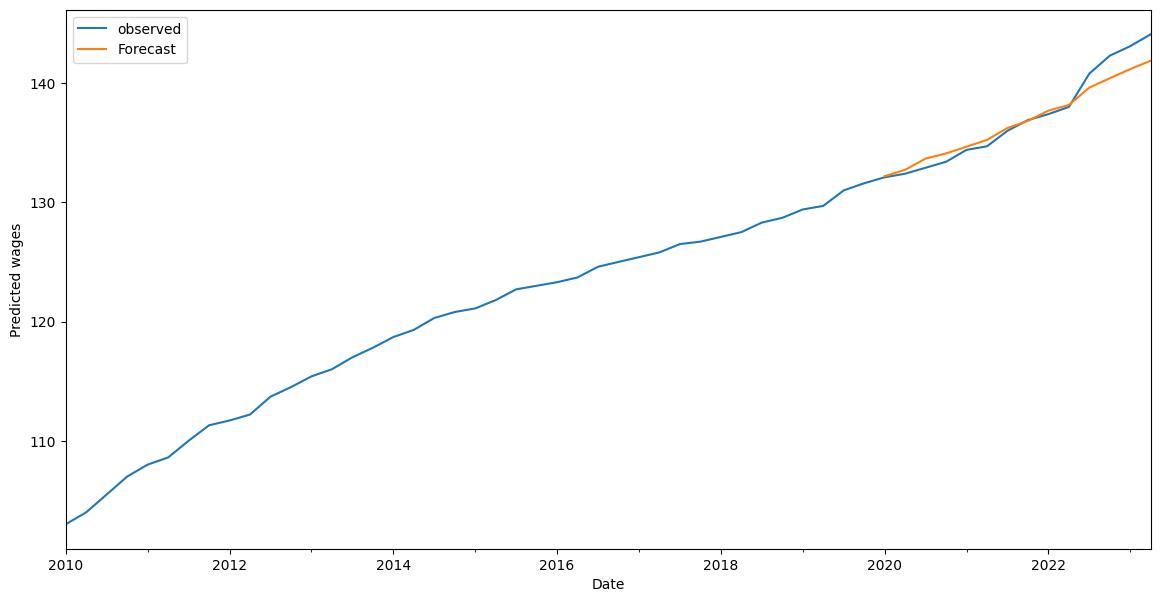

In [18]:
wages_pre_covid_nt = wages_pre_covid['NT']

mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_nt,
                                order=(4, 2, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred_uc = results.get_forecast(steps=14)
pred_ci = pred_uc.conf_int()
ax = wages_nt.plot(label='observed', figsize=(14, 7))

pred_ci["Predictions_wage"] = pred_uc.predicted_mean
print(pred_ci)


pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Predicted wages')
plt.legend()
plt.show()